In [1]:
# Домашнее задание №2: bonus по курсу "Машинное обучение"
# Выполнила Мирейко Наталья
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg

In [2]:
min_x, max_x, min_y, max_y = -10, 1, -10, 1

def generate_training_set(k):
    N = P = k
    training_set = []
    
    # Чтобы алгоритм удовлетворял ограничению "вероятность того, что прямая с угловым наклоном k окажется разделяющей 
    # для полученной выборки должна не зависеть от k" сгенерируем разделяющую прямую при помощи случайного выбора 
    # двух точек в прямоугольнике. Потом относительно этой прямой раскидаем произвольно с одной стороны N точек, а с 
    # другой P (точки генерируем за  O(N+P))
    
    x_random1 = random.uniform(min_x, max_x)
    x_random2 = random.uniform(min_x, max_x)    
    
    # Будем использовать уравнение прямой (x - x_rand1)/(x_rand1-x_rand2) = (y - ymin)/(ymin - ymax)
    
    # Генерация положительного класса
    for x in range(0, P, 1):
        x_coord = random.uniform(min_x, max(x_random1, x_random2))       
        y_for_line = min_y + (min_y - max_y)*(x_coord - x_random1)/(x_random1 - x_random2)
        if x_coord < min(x_random1, x_random2):
            y_coord = random.uniform(min_y, max_y)
        elif x_random1 < x_random2:
            y_coord = random.uniform(y_for_line, max_y)
        else:
            y_coord = random.uniform(min_y, y_for_line)
        training_set.append((np.array([1, x_coord, y_coord]), 1))
        
    # Генерация отрицательного класса
    for x in range(0, N, 1):
        x_coord = random.uniform(min(x_random1, x_random2), max_x)
        y_for_line = min_y + (min_y - max_y)*(x_coord - x_random1)/(x_random1 - x_random2)
        if x_coord > max(x_random1, x_random2):
            y_coord = random.uniform(min_y, max_y)
        elif x_random1 < x_random2:
            y_coord = random.uniform(min_y, y_for_line)
        else:
            y_coord = random.uniform(y_for_line, max_y)
        training_set.append((np.array([1, x_coord, y_coord]), -1))
        
    return training_set

In [3]:
w_for_drawing = []
incorrect_classifier_objects = []

# Aлгоритм Batch perceptron для неоднородной модели
def batch_perceptron(training_set):
    w = np.array([0, 0, 0])
    w_for_drawing.append(w)
    iteration = 0
    while True:
        improvement_possible = False
        for index, training_element in enumerate(training_set):
            if (training_element[1] * np.sign(w.dot(training_element[0]))) <= 0:
                incorrect_classifier_objects.append(index)
                w = w + training_element[1] * training_element[0]
                w_for_drawing.append(w)
                improvement_possible = True
                iteration += 1
                break
        if not improvement_possible:
            return iteration

In [4]:
training_set = generate_training_set(2)
batch_perceptron(training_set)

3

Начальное состояние


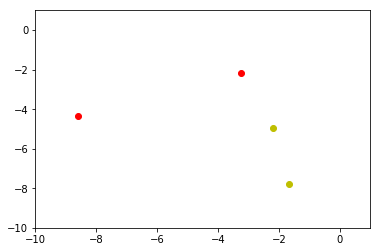

Неправильно квалифицированный объект(черный) и текущая разделяющая линия


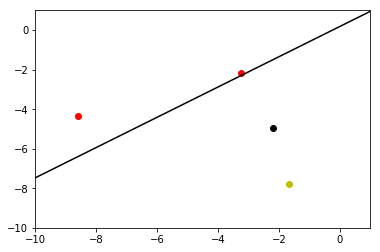

Разделяющая линия на предыдущем шаге (пунктирная линия) и текущая разделяющая линия


C:\Users\natallia.mireyka\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\natallia.mireyka\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in long_scalars


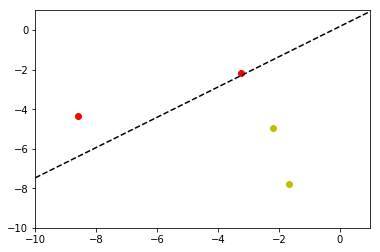

Неправильно квалифицированный объект(черный) и текущая разделяющая линия


C:\Users\natallia.mireyka\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\natallia.mireyka\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


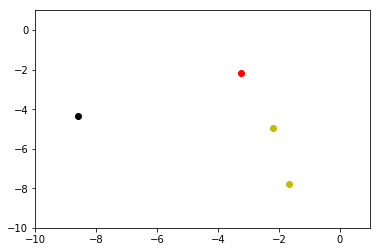

Разделяющая линия на предыдущем шаге (пунктирная линия) и текущая разделяющая линия


C:\Users\natallia.mireyka\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\natallia.mireyka\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars


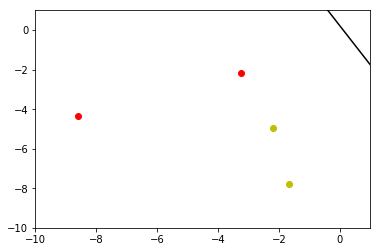

Неправильно квалифицированный объект(черный) и текущая разделяющая линия


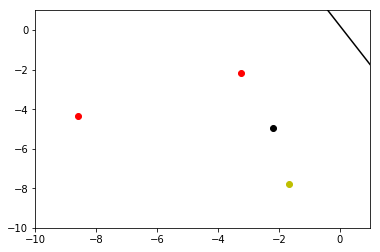

Разделяющая линия на предыдущем шаге (пунктирная линия) и текущая разделяющая линия


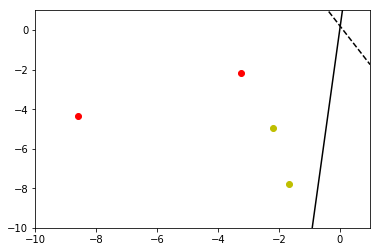

Неправильно квалифицированный объект(черный) и текущая разделяющая линия


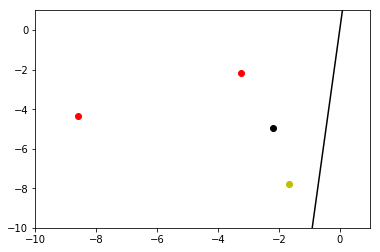

Разделяющая линия на предыдущем шаге (пунктирная линия) и текущая разделяющая линия


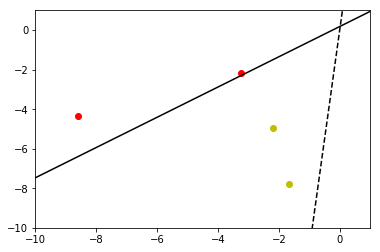

In [5]:
# Визуализация
% matplotlib inline

def draw_training_set(incorrect_classifier_object=-1):
    plt.axis([min_x, max_x, min_y, max_y])
    for index, element in enumerate(training_set):
        if index == incorrect_classifier_object:
            # Рисуем неправильно квалифицированный на данном шаге объект чёрным
            plt.plot(element[0][1], element[0][2], 'ko')
        else:
            plt.plot(element[0][1], element[0][2], 'ro' if element[1] == 1 else 'yo')

print ("Начальное состояние")
draw_training_set()
plt.show()

for x, w in enumerate(w_for_drawing):
    print ("Неправильно квалифицированный объект(черный) и текущая разделяющая линия")
    #Рисуем неправильно квалифицированный объект
    draw_training_set(incorrect_classifier_objects[x - 1])
    #Рисуем текущая разделяющую линию
    plt.plot([min_x, max_x], [(-1 * w_for_drawing[x - 1][0] - w_for_drawing[x - 1][1] * min_x) / w_for_drawing[x - 1][2],
                            (-1 * w_for_drawing[x - 1][0] - w_for_drawing[x - 1][1] * max_x) / w_for_drawing[x - 1][2]],
             color='black')
    plt.show()

    #Рисуем прямоугольник
    plt.axis([min_x, max_x, min_y, max_y])
    print ("Разделяющая линия на предыдущем шаге (пунктирная линия) и текущая разделяющая линия")
    draw_training_set()
    #Рисуем разделяющую линию предыдущего шага
    plt.plot([min_x, max_x], [(-1 * w_for_drawing[x - 1][0] - w_for_drawing[x - 1][1] * min_x) / w_for_drawing[x - 1][2],
                            (-1 * w_for_drawing[x - 1][0] - w_for_drawing[x - 1][1] * max_x) / w_for_drawing[x - 1][2]],
             linestyle='--', color='black')
    #Рисуем текущая разделяющую линию
    plt.plot([min_x, max_x], [(-1 * w_for_drawing[x][0] - w_for_drawing[x][1] * min_x) / w_for_drawing[x][2],
                            (-1 * w_for_drawing[x][0] - w_for_drawing[x][1] * max_x) / w_for_drawing[x][2]],
             color='black')
    plt.show()